# Color Space

본 파일에서는 Bloch Sphere에 Color Space를 정의하는 방법을 소개합니다.

## Import Packages

In [1]:
import qiskit
import numpy as np
import pandas as pd
from math import sqrt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization.bloch import Bloch
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector

## Color Space Definiton

기존 color space는 Cartesian Coordinates에서 x,y,z 값에 각각 R,G,B 값을 할당하는 형태로 정육면체를 이루고 있었다.

그러나 Quantum Image Processing 에서는 Bloch Sphere의 표면 위에 R,G,B 값을 할당해야 하므로 규격화를 한 다음 매핑한다.

In [28]:
color_list = []
color_index = []

df = pd.DataFrame(columns=range(1,4))

for i in range(0,256):
  for j in range(0,256):
    for k in range(0,256):

# Normalization
      r, g, b = (i,j,k)
      r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

# r,g,b to theta,phi
      theta = 2 * np.arctan2(sqrt(g**2+b**2),sqrt((1-g**2-b**2)))
      phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-r**2-g**2-b**2))
      z = np.cos(theta)
      y = np.sin(theta)*np.sin(phi)
      x = np.sin(theta)*np.cos(phi)
      color_index.append([i,j,k])
      P = np.array([x,y,z])

      color_list.append(P)

color_list

[array([ 0.26444904, -0.90496165, -0.33333333]),
 array([ 0.25207695, -0.91224006, -0.32291683]),
 array([ 0.23991013, -0.91909489, -0.31258234]),
 array([ 0.22793433, -0.92554989, -0.30232987]),
 array([ 0.21613706, -0.93162634, -0.29215943]),
 array([ 0.20450735, -0.93734343, -0.282071  ]),
 array([ 0.19303548, -0.9427185 , -0.27206459]),
 array([ 0.18171281, -0.94776736, -0.2621402 ]),
 array([ 0.17053159, -0.95250448, -0.25229783]),
 array([ 0.15948487, -0.95694312, -0.24253749]),
 array([ 0.14856636, -0.96109555, -0.23285916]),
 array([ 0.13777038, -0.96497307, -0.22326285]),
 array([ 0.12709172, -0.96858621, -0.21374856]),
 array([ 0.11652567, -0.97194476, -0.20431629]),
 array([ 0.10606788, -0.97505787, -0.19496604]),
 array([ 0.09571438, -0.97793409, -0.18569781]),
 array([ 0.08546148, -0.98058146, -0.1765116 ]),
 array([ 0.0753058 , -0.98300753, -0.16740741]),
 array([ 0.06524418, -0.98521942, -0.15838524]),
 array([ 0.0552737 , -0.98722388, -0.14944509]),
 array([ 0.04539164,

## Bloch Sphere로 매핑한 결과를 Look-Up-Table로 저장

In [14]:
for i in range(32):
    color_space = pd.Series(color_list[524288*i:524288*(i+1)], index = pd.Index(color_index[524288*i:524288*(i+1)]))
    color_space.to_excel(f"color_space{i}.xlsx", index=True)

## 특정 컬러 출력해보기

만들어둔 Look-Up-Table에서 불러오는 것이 의미적인 측면에서 가장 알맞지만 LUT의 사이즈가 매우커서 직접 불러와서 규격화 한 다음 시각화 해보기로 한다.

### Red type

In [38]:
red_type_color = []

for i in range(0,256):
  for j in range(0,256):
    r, g, b = (255,i,j)
    r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

    theta = 2 * np.arctan2(sqrt(g**2+b**2),sqrt((1-g**2-b**2)))
    phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-r**2-g**2-b**2))
    z = np.cos(theta)
    y = np.sin(theta)*np.sin(phi)
    x = np.sin(theta)*np.cos(phi)
    P = [x,y,z]
    red_type_color.append(P)

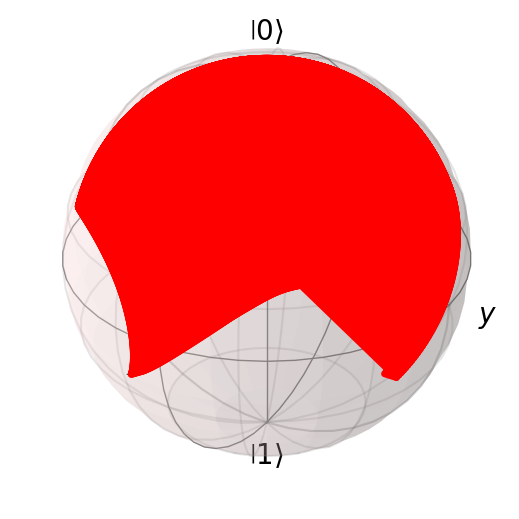

In [39]:
red_bloch = Bloch()
red_bloch.vector_color = ['red']
red_bloch.add_vectors(red_type_color)
red_bloch.render()

### Green type

In [36]:
green_type_color = []

for i in range(0,256):
  for j in range(0,256):
    r, g, b = (i,255,j)
    r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

    theta = 2 * np.arctan2(sqrt(g**2+b**2),sqrt((1-g**2-b**2)))
    phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-r**2-g**2-b**2))
    z = np.cos(theta)
    y = np.sin(theta)*np.sin(phi)
    x = np.sin(theta)*np.cos(phi)
    P = [x,y,z]
    green_type_color.append(P)

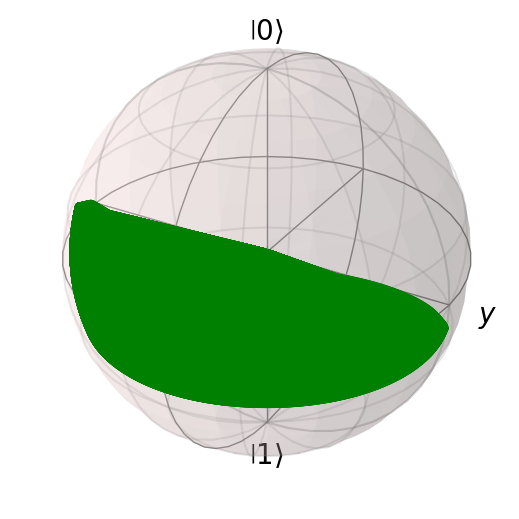

In [37]:
green_bloch = Bloch()
green_bloch.vector_color = ['green']
green_bloch.add_vectors(green_type_color)
green_bloch.render()

### Blue type

In [25]:
blue_type_color = []

for i in range(0,256):
  for j in range(0,256):
    r, g, b = (i,j,255)
    r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

    theta = 2 * np.arctan2(sqrt(g**2+b**2),sqrt((1-g**2-b**2)))
    phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-r**2-g**2-b**2))
    z = np.cos(theta)
    y = np.sin(theta)*np.sin(phi)
    x = np.sin(theta)*np.cos(phi)
    P = [x,y,z]
    blue_type_color.append(P)

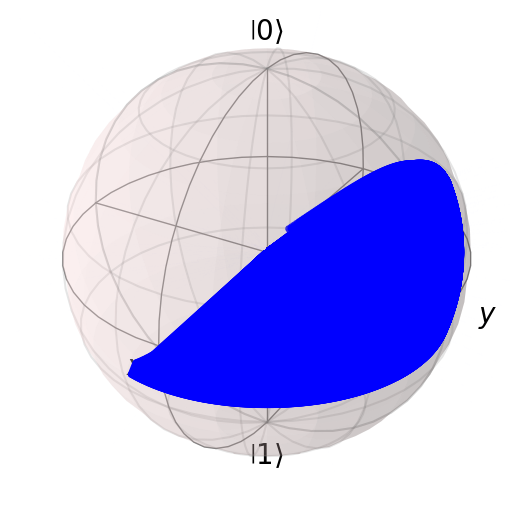

In [27]:
_bloch = Bloch()
_bloch.vector_color = ['blue']
_bloch.add_vectors(blue_type_color)
_bloch.render()

## Quantum Circuit으로 컬러 스페이스 표현해보기

RGB를 Bloch Sphere로 표현한 다음, Bloch Sphere의 Statevector를 계산하여 RGB 값을 추론해보기

R, G, B =  -0.5773502691896258 -0.5773502691896258 0.5773502691896258


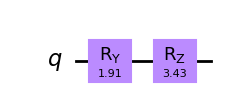

In [94]:
r, g, b = (0,0,255)
r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

qc = QuantumCircuit(1)

print("R, G, B = ",r,g,b)

theta = 2 * np.arctan2(sqrt((g**2)+(b**2)),sqrt((1-(g**2)-(b**2))))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-(r**2)-(g**2)-(b**2)))

qc.ry(theta,0)
qc.rz(phi,0)
qc.draw('mpl')

In [85]:
print(np.arctan2(1,-1))
print(np.arctan2(-1,1))

2.356194490192345
-0.7853981633974483


Statevector([-0.0817957 -0.57152672j, -0.11567658+0.80826085j],
            dims=(2,))


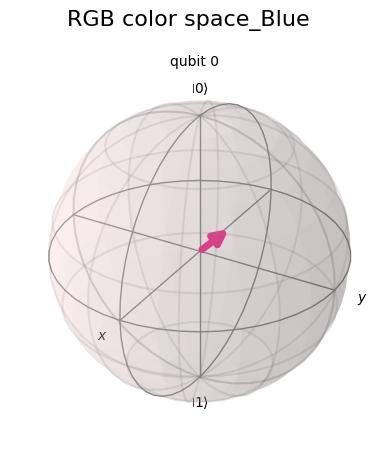

In [95]:
state = Statevector.from_instruction(qc)
print(state)

plot_bloch_multivector(state, title = "RGB color space_Blue")

위 그림과 같이 Bloch Sphere로 표현된 State의 coefficient를 사용하여 계산하면 원래 RGB 값을 추론할 수 있다

In [87]:
a_real = state[1].real
a_imag = state[1].imag

theta = 2 * np.arcsin(sqrt((a_real**2)+(a_imag**2)))
phi = 2 * np.arctan2(a_imag,a_real)

z = round(np.cos(theta),8)
y = round(np.sin(theta)*np.sin(phi),8)
x = round(np.sin(theta)*np.cos(phi),8)

print("x, y, z = ", x,y,z)

x, y, z =  -0.90496165 -0.26444904 -0.33333333


Look-Up-Table을 통해 해당 x,y,z 값을 갖는 RGB 값을 찾아보면 [0,0,255] 로 처음에 매핑한 RGB 값을 알맞게 찾을 수 있다.

### Example

#### Red Search, RGB = [255,0,0]

R, G, B =  0.5773502691896258 -0.5773502691896258 -0.5773502691896258


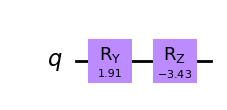

In [89]:
r, g, b = (255,0,0)
r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

qc = QuantumCircuit(1)
print("R, G, B = ",r,g,b)

theta = 2 * np.arctan2(sqrt((g**2)+(b**2)),sqrt((1-(g**2)-(b**2))))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-(r**2)-(g**2)-(b**2)))

qc.ry(theta,0)
qc.rz(phi,0)
qc.draw('mpl')

Statevector([-0.0817957 +0.57152672j, -0.11567658-0.80826085j],
            dims=(2,))


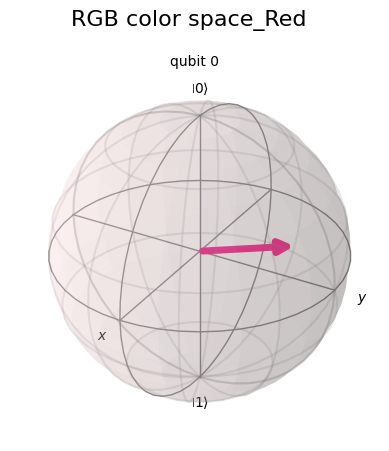

In [90]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_Red")

In [91]:
a_real = state[1].real
a_imag = state[1].imag

theta = 2 * np.arcsin(sqrt((a_real**2)+(a_imag**2)))
phi = 2 * np.arctan2(a_imag,a_real)

z = round(np.cos(theta),8)
y = round(np.sin(theta)*np.sin(phi),8)
x = round(np.sin(theta)*np.cos(phi),8)

print("x, y, z = ", x,y,z)

x, y, z =  -0.90496165 0.26444904 -0.33333333


#### Green Search, RGB = [0,255,0]

R, G, B =  -0.5773502691896258 0.5773502691896258 -0.5773502691896258


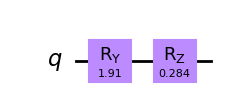

In [80]:
r, g, b = (0,255,0)
r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

qc = QuantumCircuit(1)
print("R, G, B = ",r,g,b)

theta = 2 * np.arctan2(sqrt((g**2)+(b**2)),sqrt((1-(g**2)-(b**2))))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-(r**2)-(g**2)-(b**2)))

qc.ry(theta,0)
qc.rz(phi,0)
qc.draw('mpl')

Statevector([0.57152672-0.0817957j , 0.80826085+0.11567658j],
            dims=(2,))


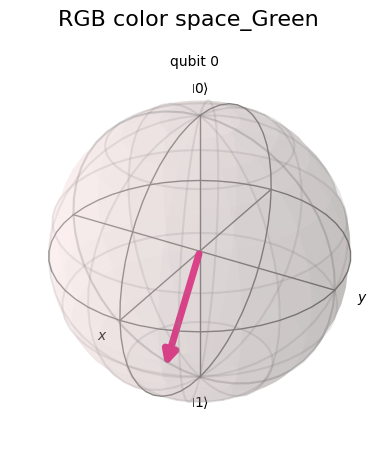

In [81]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_Green")

In [83]:
a_real = state[1].real
a_imag = state[1].imag

theta = 2 * np.arcsin(sqrt((a_real**2)+(a_imag**2)))
phi = 2 * np.arctan2(a_imag,a_real)

z = round(np.cos(theta),8)
y = round(np.sin(theta)*np.sin(phi),8)
x = round(np.sin(theta)*np.cos(phi),8)

print("x, y, z = ", x,y,z)

x, y, z =  0.90496165 0.26444904 -0.33333333


#### Magenta Search, RGB = [255,0,255]

R, G, B =  0.5773502691896258 -0.5773502691896258 0.5773502691896258


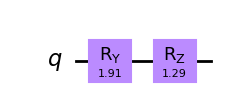

In [97]:
r, g, b = (255,0,255)
r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

qc = QuantumCircuit(1)

print("R, G, B = ",r,g,b)

theta = 2 * np.arctan2(sqrt((g**2)+(b**2)),sqrt((1-(g**2)-(b**2))))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-(r**2)-(g**2)-(b**2)))

qc.ry(theta,0)
qc.rz(phi,0)
qc.draw('mpl')

Statevector([0.46196872-0.34629213j, 0.65332242+0.48973103j],
            dims=(2,))


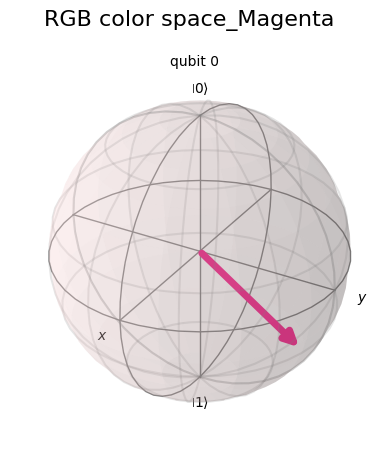

In [98]:
state = Statevector.from_instruction(qc)

print(state)
plot_bloch_multivector(state, title = "RGB color space_Magenta")

In [99]:
a_real = state[1].real
a_imag = state[1].imag

theta = 2 * np.arcsin(sqrt((a_real**2)+(a_imag**2)))
phi = 2 * np.arctan2(a_imag,a_real)

z = round(np.cos(theta),8)
y = round(np.sin(theta)*np.sin(phi),8)
x = round(np.sin(theta)*np.cos(phi),8)

print("x, y, z = ", x,y,z)

x, y, z =  0.26444904 0.90496165 -0.33333333


#### Cyan Search, RGB = [0,255,255]

R, G, B =  -0.5773502691896258 0.5773502691896258 0.5773502691896258


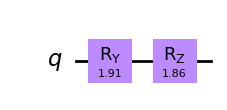

In [100]:
r, g, b = (0,255,255)
r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

qc = QuantumCircuit(1)

print("R, G, B = ",r,g,b)

theta = 2 * np.arctan2(sqrt((g**2)+(b**2)),sqrt((1-(g**2)-(b**2))))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-(r**2)-(g**2)-(b**2)))

qc.ry(theta,0)
qc.rz(phi,0)
qc.draw('mpl')

Statevector([0.34629213-0.46196872j, 0.48973103+0.65332242j],
            dims=(2,))


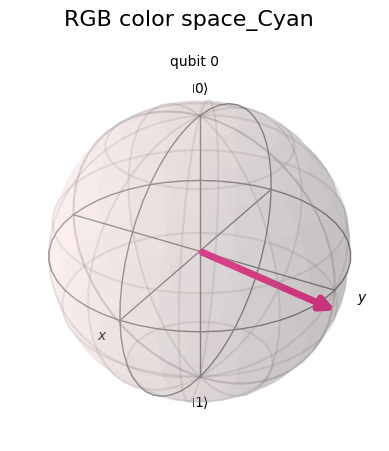

In [101]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_Cyan")

In [102]:
a_real = state[1].real
a_imag = state[1].imag

theta = 2 * np.arcsin(sqrt((a_real**2)+(a_imag**2)))
phi = 2 * np.arctan2(a_imag,a_real)

z = round(np.cos(theta),8)
y = round(np.sin(theta)*np.sin(phi),8)
x = round(np.sin(theta)*np.cos(phi),8)

print("x, y, z = ", x,y,z)

x, y, z =  -0.26444904 0.90496165 -0.33333333


#### Yellow Search, RGB = [255,255,0]

R, G, B =  0.5773502691896258 0.5773502691896258 -0.5773502691896258


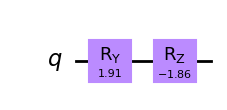

In [103]:
r, g, b = (255,255,0)
r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

qc = QuantumCircuit(1)

print("R, G, B = ",r,g,b)

theta = 2 * np.arctan2(sqrt((g**2)+(b**2)),sqrt((1-(g**2)-(b**2))))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-(r**2)-(g**2)-(b**2)))

qc.ry(theta,0)
qc.rz(phi,0)
qc.draw('mpl')

Statevector([0.34629213+0.46196872j, 0.48973103-0.65332242j],
            dims=(2,))


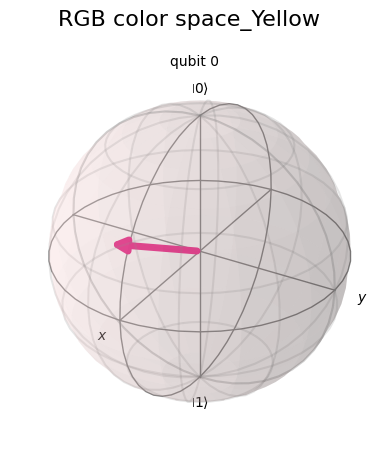

In [104]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_Yellow")

In [105]:
a_real = state[1].real
a_imag = state[1].imag

theta = 2 * np.arcsin(sqrt((a_real**2)+(a_imag**2)))
phi = 2 * np.arctan2(a_imag,a_real)

z = round(np.cos(theta),8)
y = round(np.sin(theta)*np.sin(phi),8)
x = round(np.sin(theta)*np.cos(phi),8)

print("x, y, z = ", x,y,z)

x, y, z =  -0.26444904 -0.90496165 -0.33333333


#### White Search, RGB = [255,255,255]

R, G, B =  0.5773502691896258 0.5773502691896258 0.5773502691896258


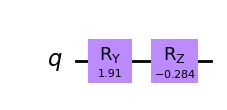

In [109]:
r, g, b = (255,255,255)
r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

qc = QuantumCircuit(1)
print("R, G, B = ",r,g,b)

theta = 2 * np.arctan2(sqrt((g**2)+(b**2)),sqrt((1-(g**2)-(b**2))))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-(r**2)-(g**2)-(b**2)))

qc.ry(theta,0)
qc.rz(phi,0)
qc.draw('mpl')

Statevector([0.57152672+0.0817957j , 0.80826085-0.11567658j],
            dims=(2,))


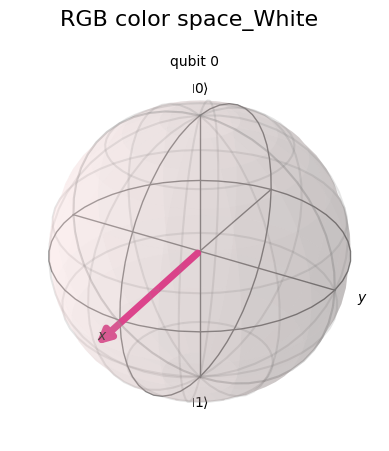

In [110]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_White")

In [111]:
a_real = state[1].real
a_imag = state[1].imag

theta = 2 * np.arcsin(sqrt((a_real**2)+(a_imag**2)))
phi = 2 * np.arctan2(a_imag,a_real)

z = round(np.cos(theta),8)
y = round(np.sin(theta)*np.sin(phi),8)
x = round(np.sin(theta)*np.cos(phi),8)

print("x, y, z = ", x,y,z)

x, y, z =  0.90496165 -0.26444904 -0.33333333


#### Black Search, RGB = [0,0,0]

R, G, B =  -0.5773502691896258 -0.5773502691896258 -0.5773502691896258


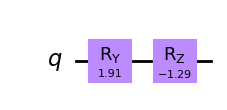

In [112]:
r, g, b = (0,0,0)
r, g, b = 2*((r/255)-0.5)/sqrt(3), 2*((g/255)-0.5)/sqrt(3), 2*((b/255)-0.5)/sqrt(3)

qc = QuantumCircuit(1)
print("R, G, B = ",r,g,b)

theta = 2 * np.arctan2(sqrt((g**2)+(b**2)),sqrt((1-(g**2)-(b**2))))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-(r**2)-(g**2)-(b**2)))

qc.ry(theta,0)
qc.rz(phi,0)
qc.draw('mpl')

Statevector([0.46196872+0.34629213j, 0.65332242-0.48973103j],
            dims=(2,))


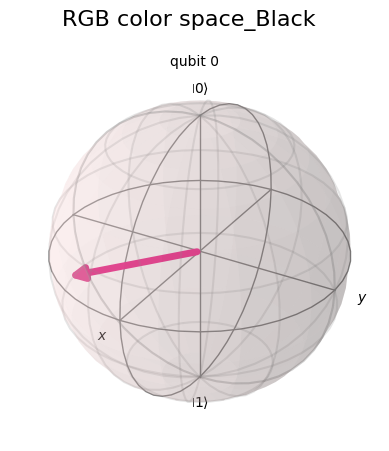

In [113]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_Black")

In [114]:
a_real = state[1].real
a_imag = state[1].imag

theta = 2 * np.arcsin(sqrt((a_real**2)+(a_imag**2)))
phi = 2 * np.arctan2(a_imag,a_real)

z = round(np.cos(theta),8)
y = round(np.sin(theta)*np.sin(phi),8)
x = round(np.sin(theta)*np.cos(phi),8)

print("x, y, z = ", x,y,z)

x, y, z =  0.26444904 -0.90496165 -0.33333333


#### Look-Up-Table 속 RGB 값과 비교

In [115]:
main_color = [np.array([ 0.26444904, -0.90496165, -0.33333333]),np.array( [-0.90496165, -0.26444904, -0.33333333]),np.array([ 0.90496165,  0.26444904, -0.33333333]),np.array([-0.26444904,  0.90496165, -0.33333333]),
              np.array([-0.90496165,  0.26444904, -0.33333333]),np.array([ 0.26444904,  0.90496165, -0.33333333]),np.array([-0.26444904, -0.90496165, -0.33333333]),np.array([ 0.90496165, -0.26444904, -0.33333333])]

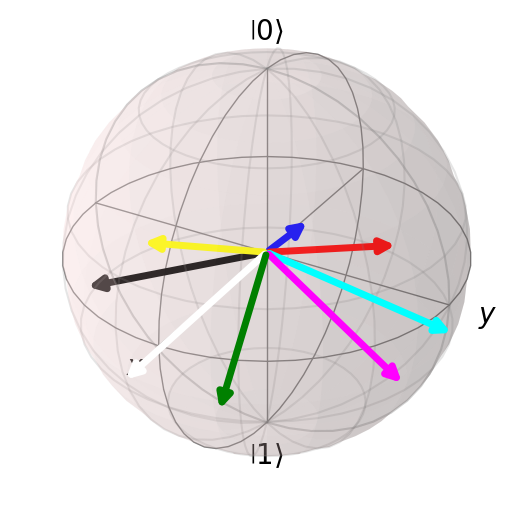

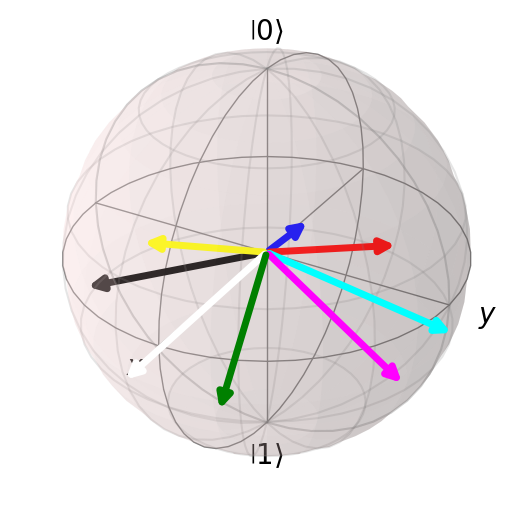

In [116]:
LUT_bloch = Bloch()
LUT_bloch.vector_color = ['black','blue','green','cyan','red','magenta','yellow','white']
LUT_bloch.add_vectors(main_color)
LUT_bloch.render()
LUT_bloch.fig

In [9]:
import os 
os.path.abspath('')

'c:\\Users\\HCI\\Desktop\\Stereo'

In [19]:
path_dir = 'c:\\Users\\HCI\\Desktop\\Stereo\\Color_space_LUT'

In [21]:
file_list = os.listdir(path_dir)
file_list

['color_space0.xlsx',
 'color_space1.xlsx',
 'color_space10.xlsx',
 'color_space11.xlsx',
 'color_space12.xlsx',
 'color_space13.xlsx',
 'color_space14.xlsx',
 'color_space15.xlsx',
 'color_space16.xlsx',
 'color_space17.xlsx',
 'color_space18.xlsx',
 'color_space19.xlsx',
 'color_space2.xlsx',
 'color_space20.xlsx',
 'color_space21.xlsx',
 'color_space22.xlsx',
 'color_space23.xlsx',
 'color_space24.xlsx',
 'color_space25.xlsx',
 'color_space26.xlsx',
 'color_space27.xlsx',
 'color_space28.xlsx',
 'color_space29.xlsx',
 'color_space3.xlsx',
 'color_space30.xlsx',
 'color_space31.xlsx',
 'color_space4.xlsx',
 'color_space5.xlsx',
 'color_space6.xlsx',
 'color_space7.xlsx',
 'color_space8.xlsx',
 'color_space9.xlsx']

In [26]:
file = path_dir + '/' + file_list[25]

In [27]:
file

'c:\\Users\\HCI\\Desktop\\Stereo\\Color_space_LUT/color_space31.xlsx'

In [43]:
import pandas as pd

filename = file
df = pd.read_excel(filename,names = ['RGB','value'])

print(df)

                    RGB                                  value
0           [248, 0, 0]  [-0.92552934  0.17967841 -0.33333333]
1           [248, 0, 1]  [-0.92994195  0.17587691 -0.32291683]
2           [248, 0, 2]  [-0.93412506  0.17234457 -0.31258234]
3           [248, 0, 3]  [-0.93808951  0.16907013 -0.30232987]
4           [248, 0, 4]  [-0.94184527  0.16604327 -0.29215943]
...                 ...                                    ...
524283  [255, 255, 251]  [ 0.92426618 -0.24571303 -0.29215943]
524284  [255, 255, 252]  [ 0.91986134 -0.24990351 -0.30232987]
524285  [255, 255, 253]  [ 0.91518721 -0.25441039 -0.31258234]
524286  [255, 255, 254]  [ 0.91022696 -0.25925202 -0.32291683]
524287  [255, 255, 255]  [ 0.90496165 -0.26444904 -0.33333333]

[524288 rows x 2 columns]


In [50]:
256*256*8

524288

In [53]:
df['RGB'][256*256*7]

'[255, 0, 0]'

In [64]:
coord_ = df['value'][256*256*8-1]

In [167]:
coord = df['value'][256*256*7]

In [168]:
coord

'[-0.90496165  0.26444904 -0.33333333]'

In [169]:
x = float(coord[1:12])
y = float(coord[13:24])
z = float(coord[25:36])

In [170]:
theta = np.arccos(z)
phi = np.arctan2(y,x)

In [84]:
def project(img, n):

    (row, col, _) = img
    x = row
    y = col
    z = 0
    print("x,y,z = ",x,y,z)
    r = round(np.sqrt(2**(2*n)/(8 * np.pi)),4)
    Q = np.array([x, y, z], dtype=np.float32)
    X = get_2d_to_3d(Q,r)
    return X

def get_2d_to_3d(point,r):
    [x, y, _] = point
    k = round(4*r**2 / (x**2 + y**2 + 4*r**2), 4)
    print("r = ", r, " k = ", k)
    P = np.array([k * x, k * y, (1-2*k)*r ])
    size = np.sqrt(P[0]**2+P[1]**2+P[2]**2)
    resize = P*(1/size)
    k = k * (1/size)
    k_list.append(k)
    return resize

In [133]:
k_list = []

Q  = np.array([1,1,0])

point_3d = project(Q,1)
point_3d

x,y,z =  1 1 0
r =  0.3989  k =  0.2414


array([0.60518137, 0.60518137, 0.51721467])

In [172]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

c = QuantumRegister(1,'c_reg')
pixel = QuantumRegister(1, "Pixel")
color = QuantumRegister(size=1, name = "color space")
cla = ClassicalRegister(c.size+pixel.size, "Classical")

qc = QuantumCircuit(c,pixel,color,cla)

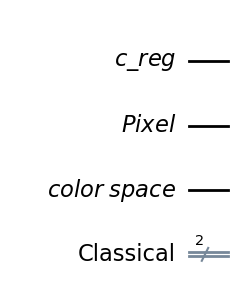

In [173]:
qc.draw('mpl')

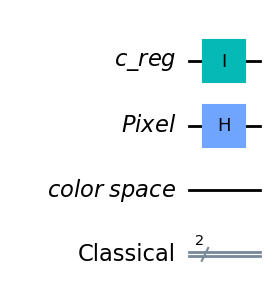

In [174]:
qc.id(c)
qc.h(pixel)
qc.draw('mpl')

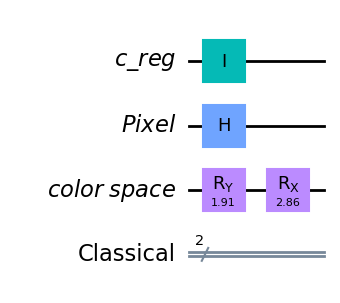

In [175]:
theta = np.arccos(z)
phi = np.arctan2(y,x)

qc.ry(theta,2)
qc.rx(phi,2)

qc.draw('mpl')

In [176]:
point_3d

array([0.60518137, 0.60518137, 0.51721467])

In [177]:
thetas = []
theta = round(np.arccos(point_3d[2]),4)
thetas.append(theta)
thetas

[1.0272]

In [179]:
import math

coord_q_num = int(np.ceil(math.log(len(point_3d), 2)))

controls_ = []
for i, _ in enumerate(pixel):
    controls_.extend([pixel[i]])

for i, theta in enumerate(thetas):
    qubit_index_bin = "{0:b}".format(i).zfill(coord_q_num)
    
    for k, qub_ind in enumerate(qubit_index_bin):
        if int(qub_ind):
            qc.x(pixel[k])
                
    qc.barrier()
    # for coord_or_intns in (0,1):
    qc.mcry(theta=theta,
                  q_controls=controls_,
                  q_target=c[0])

    qc.barrier()
    for k, qub_ind in enumerate(qubit_index_bin):
        if int(qub_ind):
            qc.x(pixel[k])
           
    qc.barrier()


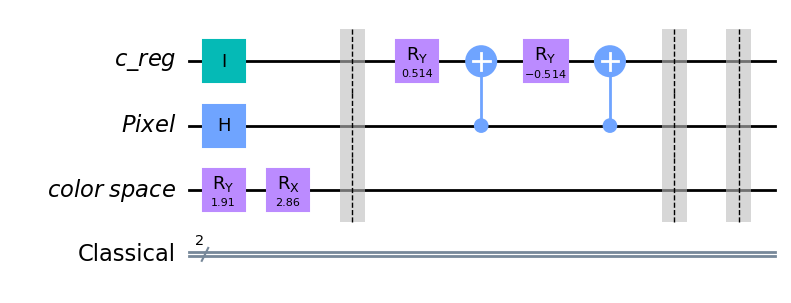

In [180]:
qc.draw('mpl')

In [117]:
import math
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.extensions import XGate
from qiskit import QuantumCircuit, Aer
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram
from ionq_config import coupling_map, basis_gates

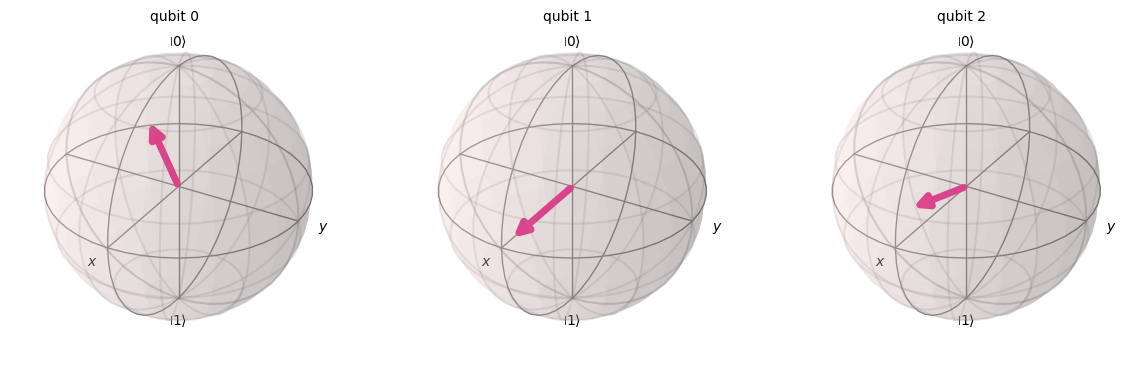

In [181]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [182]:
qc.measure([0,1],[1,0])

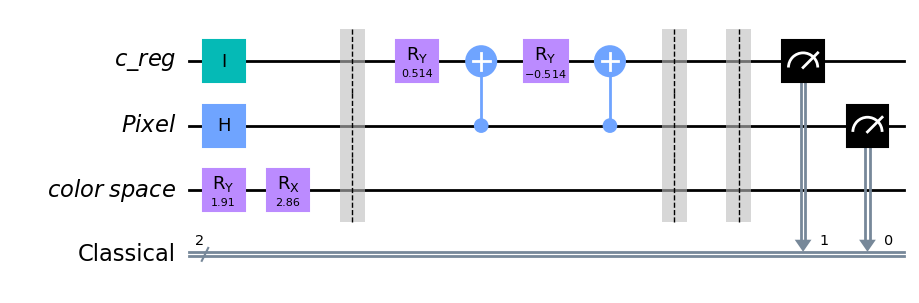

In [183]:
qc.draw('mpl')

In [184]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_oqim = aer_sim.run(qobj)
result_oqim = job_oqim.result()
counts_oqim = result_oqim.get_counts()

C:\Users\HCI\AppData\Local\Temp\ipykernel_3044\2176529097.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job_oqim = aer_sim.run(qobj)


In [185]:
counts_oqim.items()

dict_items([('00', 4075), ('01', 3111), ('11', 1006)])

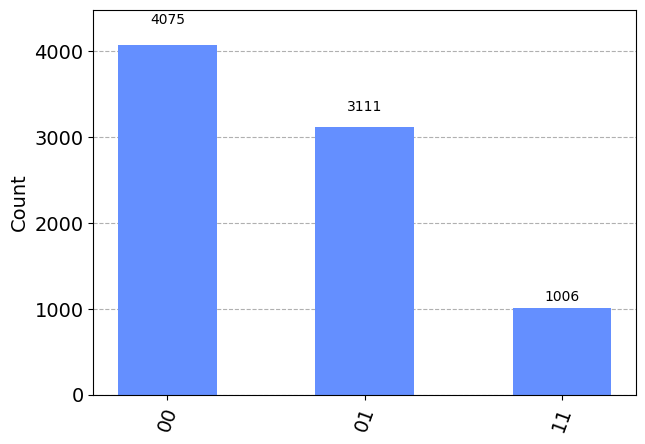

In [186]:
plot_histogram(counts_oqim)

In [178]:
phis = []
phi = round(np.arctan2(point_3d[1],point_3d[0]),4)
phis.append(phi)
phis

[0.7854]

In [187]:
theta_re = [np.arccos(4075/np.sqrt(4075**2+3111**2))]
phis

point_3d_re = []
for theta, phi in zip(theta_re, phis):
    x = np.cos(phi)
    y = np.sin(phi)
    z = np.cos(theta)
    point_3d_re.append(np.array([x,y,z]))

point_3d_re

[array([0.70710548, 0.70710808, 0.79484479])]

scaled_point_3d = [array([0.5535459 , 0.55354793, 0.62223117])]


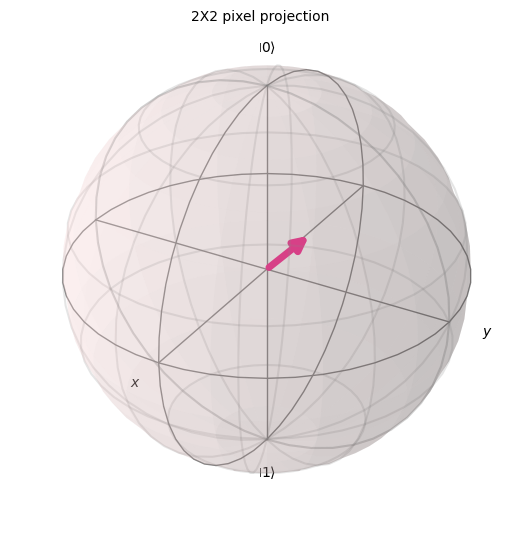

In [188]:
scaled_point_3d_re = []
size_list = []

for i in range(len(point_3d_re)):
    size = np.linalg.norm(point_3d_re[i])
    resize = point_3d_re[i]*(1/size)
    scaled_point_3d_re.append(resize)
    size_list.append(size)

print("scaled_point_3d =", scaled_point_3d_re)
plot_bloch_vector(scaled_point_3d_re, title='2X2 pixel projection')

[0.6051813702832235]
backward_Q = [array([1.16841912, 1.16842341, 0.        ])]


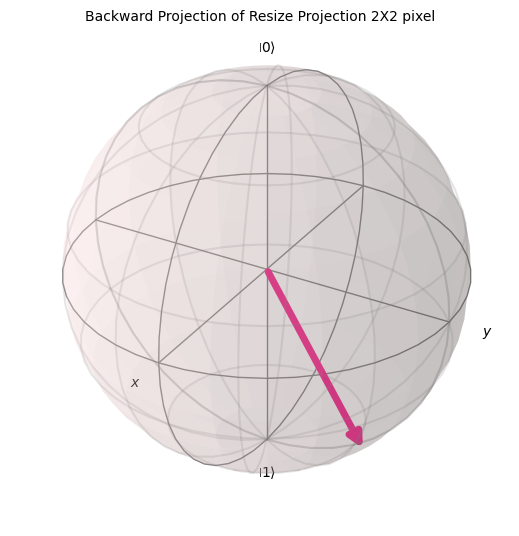

In [189]:
backward_Q_re = []
for i in range(len(scaled_point_3d_re)):
    backward = scaled_point_3d_re[i] * (size_list[i]) * (1/k_list[i])
    print(k_list)
    backward_Q_re.append(np.array([backward[0], backward[1], 0]))


print("backward_Q =", backward_Q_re)
plot_bloch_vector(backward_Q_re, title='Backward Projection of Resize Projection 2X2 pixel')